# 4. Product Type Unsupervised Analysis

Before going into the construction of the opposite query, we want to understand what product types are there in our data.  
In this notebook, we are going to visualize the **product_title embedding** in our development dataset. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import altair as alt
import umap 
from PIL import Image

## Prepare the required dataset

In [2]:
df_product_title_embedding = pd.read_pickle('../resources/data/apparel_15to25_product_title_only.pkl')
# Sample 1000 records for our study 
df_sample = df_product_title_embedding.groupby(by='product_id').first().reset_index().sample(n=1000, random_state=42).reset_index(drop=True)
df_sample.head(3)

,product_id,product_title,product_category,star_rating,review_id,review_headline,review_body,review_length,review_count,product_title_and_review,product_title_embedding
0,B00QSRYI2A,Mamia Women's 6 Pack Solid Microfiber Bra Neut...,Apparel,5.0,RI0SMY9YMX9SL,This Pack is like the 'Must have' Bra combo,This Pack is like the 'Must have' Bra combo! I...,23,25,Mamia Women's 6 Pack Solid Microfiber Bra Neut...,"[-0.015392402186989784, -0.00802965834736824, ..."
1,B0018OHHFI,Levi's Men's 550 Relaxed-Fit Jean,Apparel,1.0,RET379EI450HF,Wrong style; wrong size.,I received the wrong style (501) in the wrong ...,38,15,Levi's Men's 550 Relaxed-Fit Jean. I received ...,"[0.0020673491526395082, -0.00921099353581667, ..."
2,B00S1T56NS,KBETHOS Galaxy Bucket Hat,Apparel,5.0,R2BZ2CJWAJN2Z2,"Check the forecast, it's Wavy Q",I should make the news. My fortune says that I...,17,15,KBETHOS Galaxy Bucket Hat. I should make the n...,"[-0.01016283594071865, -0.02000829018652439, -..."


In [3]:
# we need to extract and unpack the vectors in the product_title_embedding column 
df_vector = pd.DataFrame(df_sample['product_title_embedding'].values.tolist()).add_prefix('data')
df_vector.head(3)

,data0,data1,data2,data3,data4,data5,data6,data7,data8,data9,...,data1526,data1527,data1528,data1529,data1530,data1531,data1532,data1533,data1534,data1535
0,-0.015392,-0.008030,-0.013005,-0.049298,-0.008003,0.011678,-0.024476,-0.025023,0.011691,-0.033426,...,0.000127,0.014792,0.042309,-0.036760,-0.010651,0.030491,-0.010817,-0.015753,0.007890,-0.040682
1,0.002067,-0.009211,-0.004221,-0.009307,-0.029081,0.012792,-0.034897,-0.025878,-0.011594,-0.016065,...,0.017410,0.001426,0.018947,-0.003622,-0.012350,0.032796,0.011152,0.005858,0.004903,-0.003690
2,-0.010163,-0.020008,-0.007002,-0.059086,-0.024544,0.011809,-0.008926,-0.009660,0.022151,0.005392,...,0.001196,0.008959,0.020392,-0.006354,-0.004589,0.038324,-0.009442,-0.005600,-0.011763,-0.012755


## Define helper functions

We will use UMAP for dimension reduction. UMAP is a non-linear dimension reduction technique which can provide more optimized separation for 2-dimensions when compared to PCA.  
For details, please refer to official documents of UMAP at https://umap-learn.readthedocs.io/en/latest/index.html

In [4]:
# make a func to handle the mixed- type data and return the final UMAP embeddings
def umap_embed(df, n_components=2,  n_neighbors= 50, random_state=42):
    reducer = umap.UMAP(random_state=random_state, n_components=n_components, n_neighbors=n_neighbors, metric='cosine')
    umap_embedding = reducer.fit_transform(df)
   
    return umap_embedding

In [5]:
# make helper function for plotting
def make_umap_plot(df,x,y):
    plot = alt.Chart(data=df_sample).mark_circle(size=60).encode(
        x=alt.X(x+':Q'),
        y=alt.Y(y+':Q'),
        color=alt.Color('star_rating:Q', scale=alt.Scale(scheme='yellowgreenblue')),
        tooltip=[
            'product_title:N'
        ]
    ).properties(
        width=900,
        height=600,
        title = 'Scatter plot for product_title + review_body embedding with dimensions reduced by UMAP'
    ).interactive()

    return plot

## Create a scatter plot to explore the product types

We'll create a scatter plot to show the **product_title + review_body embedding** with dimensions reduced by UMAP.  
This scatter plot is interactive where user can read the **product_title** of each circle when mouse-over.  
Also, we use **star_rating** for the color of circles. The more diverging the colors within a product type, the higher chance of having contradicting reviews, which is what we want to examine the construction of the opposite query.   

In [6]:
# Reduce the dimensions to 2
n10_embedding_ = umap_embed(df=df_vector, n_neighbors=10)

In [7]:
df_sample['n10_comp1'] = pd.Series(n10_embedding_[:,0])
df_sample['n10_comp2'] = pd.Series(n10_embedding_[:,1])

In [8]:
# uncomment below lines to make a new visualization. 
#plot = make_umap_plot(df_sample, 'n10_comp1','n10_comp2')
#plot

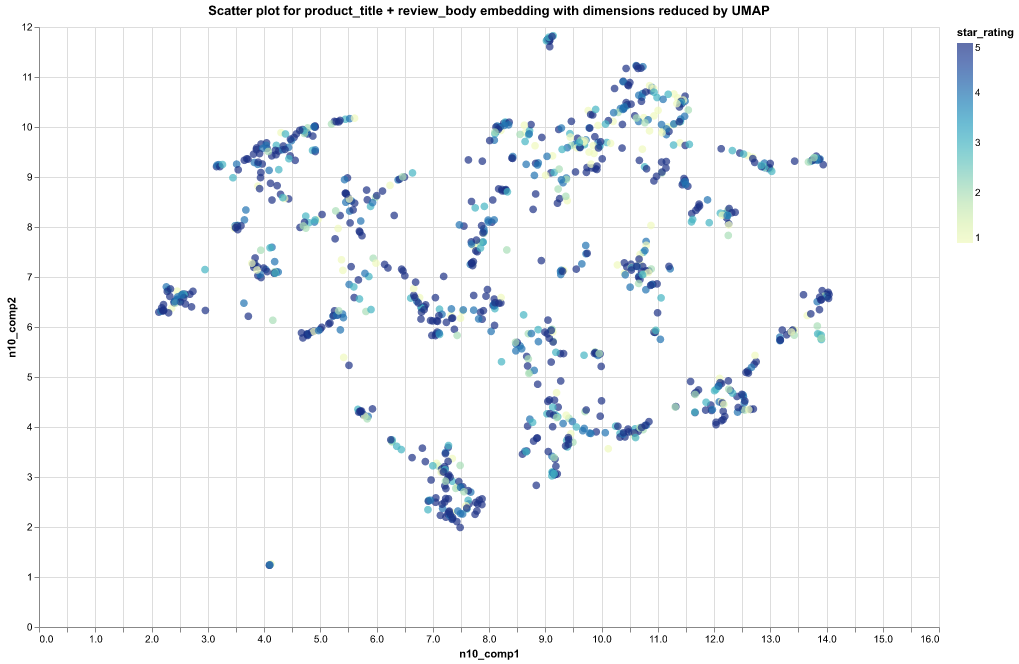

In [9]:
# we save the scatter plot and reload it such that it can be seen in GitHub as the display of Altair vis there is not supported 

# uncomment the plot.save() line to overwrite the existing one
#plot.save('../resources/img/unsupervised_analysis.png')
Image.open('../resources/img/unsupervised_analysis.png')